Goal

- Rate review [1-5]
- Sentiment analysis [1-2: negative, 3: neutral, 4-5: positive]

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

100% 2.79M/2.79M [00:00<00:00, 5.21MB/s]
100% 2.79M/2.79M [00:00<00:00, 4.43MB/s]


In [ ]:
!unzip womens-ecommerce-clothing-reviews.zip

Archive:  womens-ecommerce-clothing-reviews.zip
  inflating: Womens Clothing E-Commerce Reviews.csv  


In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

dataset

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [ ]:
dataset.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
data = dataset[["Review Text", "Rating", "Recommended IND", "Positive Feedback Count"]]

In [ ]:
data.isna().sum()

Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

<ipython-input-13-1edeb318a43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [ ]:
data.isna().sum()

Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
dtype: int64

In [ ]:
import seaborn as sb

<Axes: xlabel='Rating', ylabel='count'>

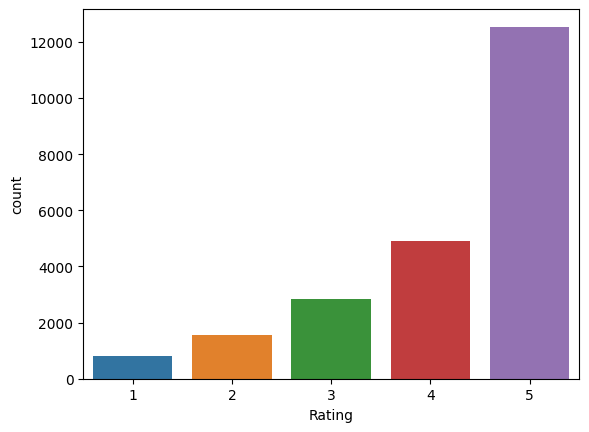

In [ ]:
sb.countplot(data=data, x='Rating')

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_and_tokenize(review):
    text = review.lower()

    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)

    stemmer = WordNetLemmatizer()

    text = " ".join(stemmer.lemmatize(token) for token in tokens)

    text = re.sub("[^a-z']"," ", text)

    return text

In [ ]:
data["Clean Review Text"] = data["Review Text"].apply(clean_and_tokenize)

<ipython-input-27-ac5c20902a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Clean Review Text"] = data["Review Text"].apply(clean_and_tokenize)


In [ ]:
data

Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count  \
0                    1                        0   
1                    1                        4   
2                    0                        0   
3                    1                        0   
4                    1                        6   
...                ...                      ...   
23481                1                        0   
23482                1                        0   
23483                0                        1   
23484                1                        2   
23485                1                       22   

                                       Clean Review Text  
0      absolutely wonderful   silky and sexy and comf...  
1      love this dress   it 's sooo pretty  i happene...  
2      i had such high hope for this dress and really...  
3      i love   love   love this jumpsuit  it 's fun ...  
4      this shirt is very flattering to all due to th...  
...                                                  ...  
23481  i wa very happy to snag this dress at such a g...  
23482  it reminds me of maternity clothes  soft   str...  
23483  this fit well   but the top wa very see throug...  
23484  i bought this dress for a wedding i have this ...  
23485  this dress in a lovely platinum is feminine an...  

[22641 rows x 5 columns]

In [ ]:
def sentiment(review):
  if review['Rating'] >= 4:
    return 'Positive'
  elif review['Rating'] == 3:
    return 'Neutral'
  elif review['Rating'] <= 2:
    return 'Negative'

In [ ]:
data['Sentiment'] = data.apply(lambda row: sentiment(row), axis=1)

<ipython-input-22-c4b783ad2a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data.apply(lambda row: sentiment(row), axis=1)


In [ ]:
data

Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count  \
0                    1                        0   
1                    1                        4   
2                    0                        0   
3                    1                        0   
4                    1                        6   
...                ...                      ...   
23481                1                        0   
23482                1                        0   
23483                0                        1   
23484                1                        2   
23485                1                       22   

                                       Clean Review Text Sentiment  
0      absolutely wonderful   silky and sexy and comf...  Positive  
1      love this dress   it 's sooo pretty  i happene...  Positive  
2      i had such high hope for this dress and really...   Neutral  
3      i love   love   love this jumpsuit  it 's fun ...  Positive  
4      this shirt is very flattering to all due to th...  Positive  
...                                                  ...       ...  
23481  i wa very happy to snag this dress at such a g...  Positive  
23482  it reminds me of maternity clothes  soft   str...   Neutral  
23483  this fit well   but the top wa very see throug...   Neutral  
23484  i bought this dress for a wedding i have this ...   Neutral  
23485  this dress in a lovely platinum is feminine an...  Positive  

[22641 rows x 6 columns]

In [ ]:
pos_review = data[data['Sentiment'] == 'Positive']
neut_review = data[data['Sentiment'] == 'Neutral']
neg_review = data[data['Sentiment'] == 'Negative']

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def wc(data,bgcolor,title, sentiment):
    plt.figure(figsize = (20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50, width=800, height=400).generate(' '.join(data))

    plt.title('Words from ' + sentiment + ' Reviews\n',size=30)
    plt.imshow(wc)
    plt.axis('off')

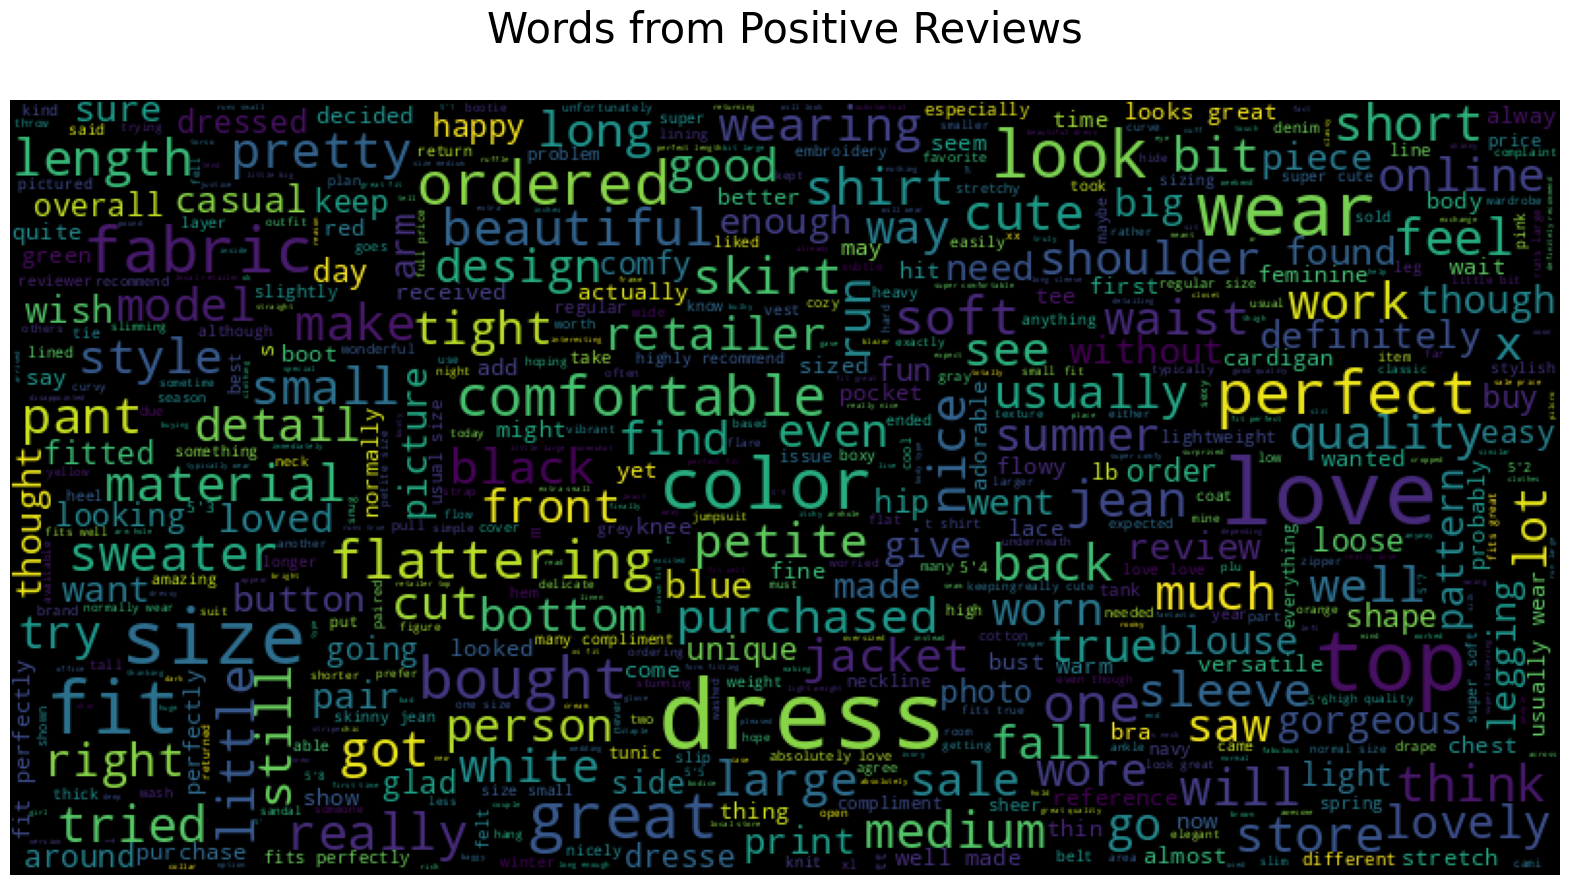

In [ ]:
wc(pos_review['Review Text'],'black','Most Used Words', 'Positive')

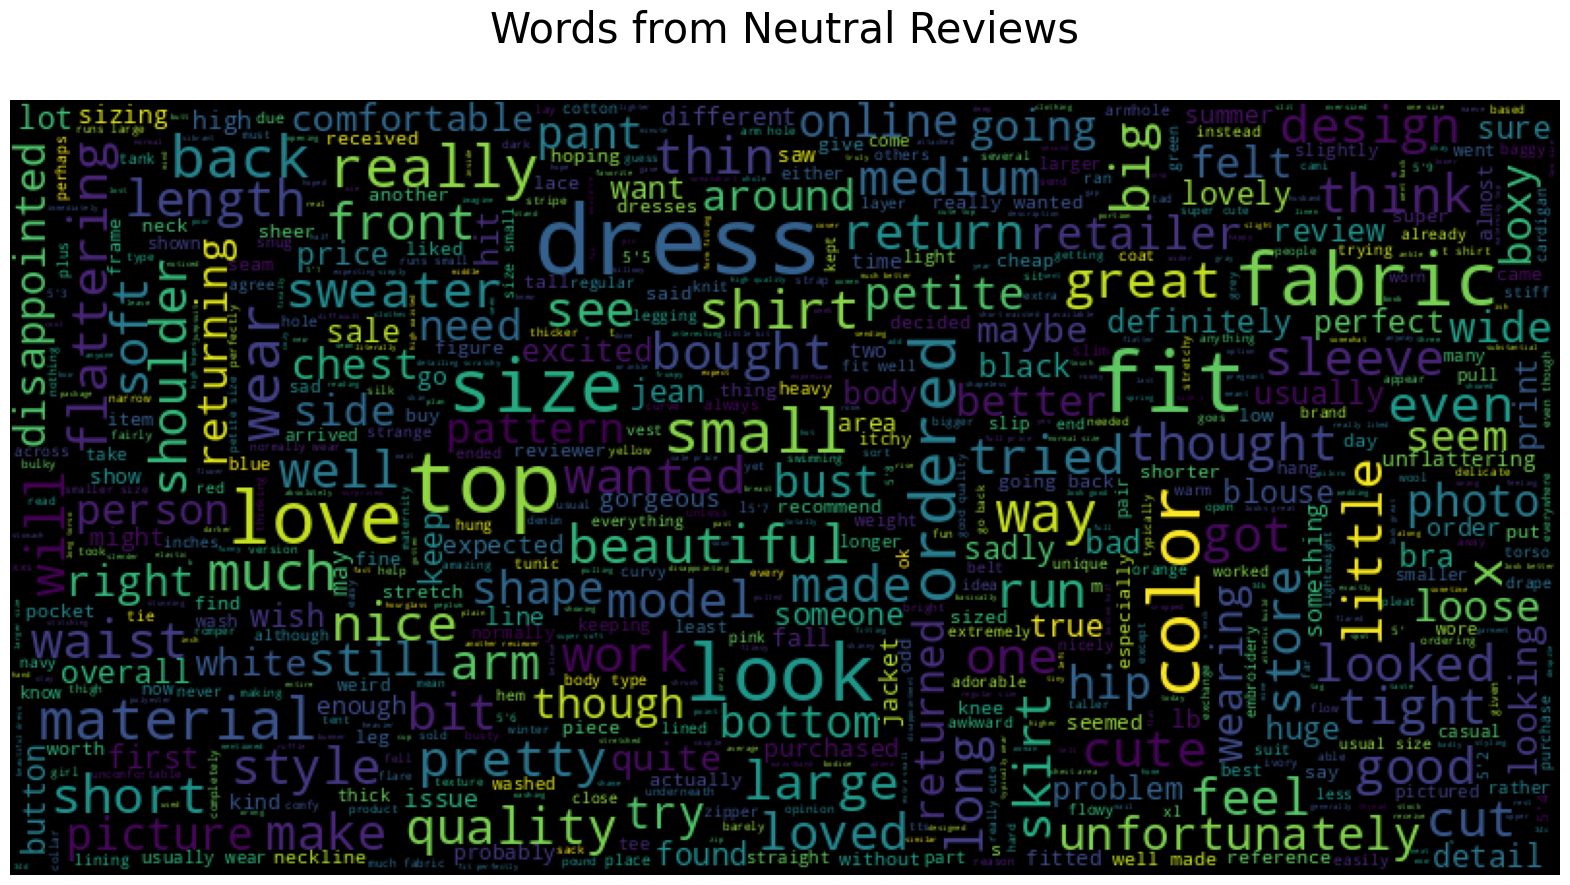

In [ ]:
wc(neut_review['Review Text'],'black','Most Used Words', 'Neutral')

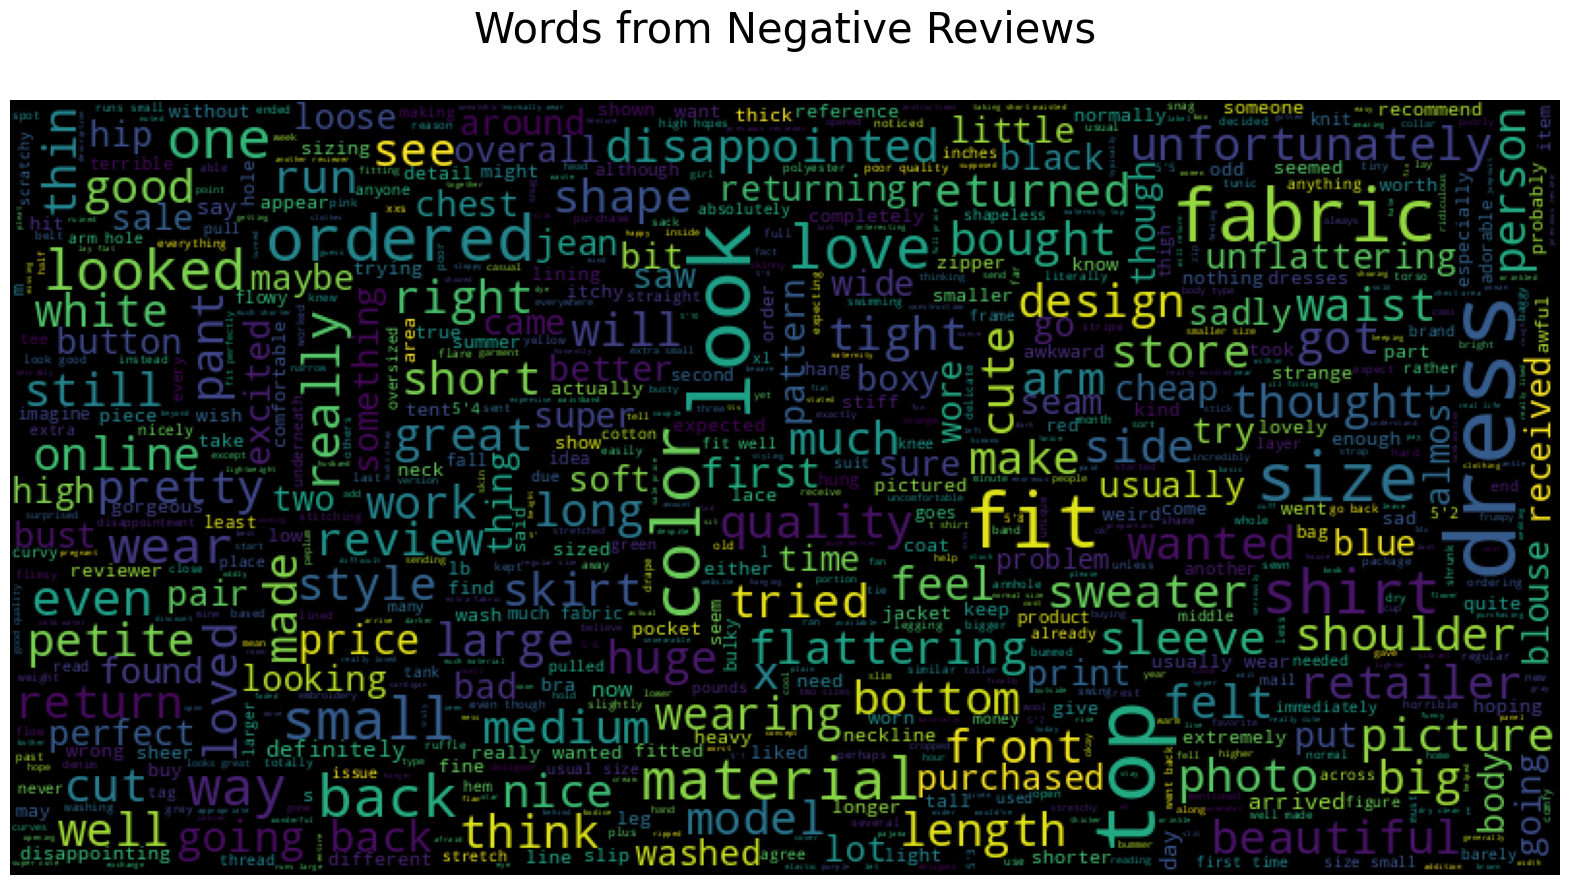

In [ ]:
wc(neg_review['Review Text'],'black','Most Used Words', 'Negative')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['Clean Review Text'])
y = data['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.31      0.03      0.05       182
           2       0.28      0.08      0.13       307
           3       0.39      0.44      0.42       628
           4       0.38      0.41      0.40       950
           5       0.78      0.86      0.82      2462

    accuracy                           0.62      4529
   macro avg       0.43      0.36      0.36      4529
weighted avg       0.59      0.62      0.60      4529

